# Lecture 3-4: Solutions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optimize
import scipy.stats as stats

## Boggs Test Problem

In this problem, we try to solve the 2-by-2 nonlinear system of equations $f(x)=0$ introduced by [Bloggs](https://www.jstor.org/stable/2949607) where

$$f(x) = \begin{bmatrix}
x_1^2 - x_2 + 1 \\
x_1 - \cos(\tfrac{\pi}{2} x_2)
\end{bmatrix}$$

with Jacobian

$$J(x) = \begin{bmatrix}
2x_1 & -1 \\
1 & \tfrac{\pi}{2} \sin(\tfrac{\pi}{2} x_2)
\end{bmatrix}.$$

The problem has solutions $(-1, 2)$, $(0, 1)$, and $(-1/\sqrt(2), 3/2)$.

Implement the function and its Jacobian. Inspect the signature (i.e., check its documentation) of SciPy's `optimize.root` function.
- Use `optimize.root` with the 'hybr' method to numerically locate the solutions. 
- Choose your initial guesses on the circle with radius 2 and center in the origin: $(2 \cos(\rho), 2 \sin(\rho))$ for $\rho \in [0, 2\pi]$. 
- For several values of $\rho$ report the solution you obtain. 
    - Note that for some points, the algorithm might not converge. Display a different message in such cases.

In [2]:
def f(x):
    """Evaluate test function.
    
    Arguments
    x : np.ndarray {(2,), (2, N)}
        Single 2D array, or 2D arrays in columns of matrix.
    """
    return np.array([x[0]**2 - x[1] + 1, x[0] - np.cos(np.pi / 2 * x[1])])

def jac(x):
    """Evaluate Jacobian of test function."""
    return np.array([
        [2 * x[0], -1],
        [1, np.pi / 2 * np.sin(np.pi / 2 * x[1])]
    ])

solutions = np.array([
    [-1, 2],
    [0, 1],
    [-1/np.sqrt(2), 1.5],
])

In [3]:
def circle(rho, radius=1.0):
    """Return point on circle with given angle and radius."""
    x = np.array([np.cos(rho), np.sin(rho)])
    return radius * x

#There's multiple ways to print a message, of course. It's important there is the 
#distinction between whether the method converged or not.
def display_result(guess, result):
    """Display convergenge result for initial guess."""
    print('x = [%.4f, %.4f] ' % (guess[0],guess[1]), end='')
    if result.success:
        solution = result.x
        print('converged to [%.4f, %.4f]' % (solution[0],solution[1]))
    else:
        print('did not converge:\n %s' % (result.message))

In [4]:
# Solve for various points on circle with radius 2.
radius = 2.0
angles = np.linspace(0, 2*np.pi)
for rho in angles:
    x_init = circle(rho, radius)
    result = optimize.root(f, x_init, method='hybr', jac=jac)
    display_result(x_init, result)

x = [2.0000, 0.0000] converged to [0.0000, 1.0000]
x = [1.9836, 0.2558] converged to [-0.0000, 1.0000]
x = [1.9346, 0.5073] converged to [0.0000, 1.0000]
x = [1.8538, 0.7505] converged to [0.0000, 1.0000]
x = [1.7426, 0.9814] converged to [0.0000, 1.0000]
x = [1.6028, 1.1962] converged to [0.0000, 1.0000]
x = [1.4367, 1.3914] converged to [-0.0000, 1.0000]
x = [1.2470, 1.5637] converged to [-0.0000, 1.0000]
x = [1.0368, 1.7103] converged to [0.0000, 1.0000]
x = [0.8096, 1.8288] converged to [0.0000, 1.0000]
x = [0.5691, 1.9173] converged to [-0.0000, 1.0000]
x = [0.3192, 1.9744] converged to [-0.0000, 1.0000]
x = [0.0641, 1.9990] converged to [-0.7071, 1.5000]
x = [-0.1920, 1.9908] converged to [-0.7071, 1.5000]
x = [-0.4450, 1.9499] converged to [-1.0000, 2.0000]
x = [-0.6907, 1.8769] converged to [-1.0000, 2.0000]
x = [-0.9251, 1.7732] converged to [-1.0000, 2.0000]
x = [-1.1442, 1.6403] converged to [-0.7071, 1.5000]
x = [-1.3446, 1.4806] converged to [-0.7071, 1.5000]
x = [-1.5229,

## Underdetermined linear systems revisited

Consider an underdetermined linear system of equations, i.e.,

$$ Ax = b,$$

with $A$ an ${m \times n}$ matrix with $m > n$, where $A \in \mathbb{R}^{m \times n}$ and $b \in \mathbb{R}^m$. In general, no solution to this system will exist. 

We have already seen the least-squares solution obtained from

$$\min_x z(A,x,b) = \| Ax - b \|_2^2.$$

Note that the least-squares solutions places no restrictions on $x$. In many practical applications, we may desire to restrict the coefficients of $x$, for instance by looking at the 1-norm: $\| x \|_1 = \sum_i |x_i|$. The problem now becomes a two-objective optimization problem: the MSE (mean squared error) and the 1-norm of the coefficients. This can be incorporated by adding a penalty to the objective:

$$\min_x z(x, A, b, \mu) = \frac{1}{m} \| Ax - b \|_2^2 + \mu \| x \|_1.$$


1. Create a random $500 \times 100$ system of linear equations with all coefficients taken uniformly in $[0, 1]$. (That is, you have to generate $A$ and $b$.)
2. Get the standard least-squares solution and evaluate the MSE and 1-norm of the coefficients $x$.
3. Define the penalized objective, i.e., the sum of the MSE and a 1-norm weighted by a scalar $\mu$.
4. Minimize the penalized objective for various value of $\mu$ (`mu = [0, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]`). Use the objective defined in part 3 and the `minimize` function from `scipy.optimize` module. Scatter plot the resulting MSEs and 1-norm of the solutions in a figure.

In [19]:
#1
m, n = 500, 100
A = np.random.rand(m,n)
b = np.random.rand(m)

In [20]:
#2
def standard(A,b):
    m, n = np.shape(A) #We don't need 'n' for this function actually
    """
    Input:  Constraint matrix A (m x n ndarray) and right hand side vector b (1 x m) ndarray.
    Output: Least-squares solution x and its mean squared error mse (which is 
            the second output argument of linalg.lstsq divided by m).
    """
    x, *_ = np.linalg.lstsq(A,b,rcond=None)
    return x

#Returns the mse and 1-norm of approximate solution x
def errors(x,A,b):
    m = np.shape(A)[0]
    mse = np.sum((A@x - b)**2)/m
    one_norm = np.linalg.norm(x,ord=1)
    return mse, one_norm

In [21]:
#3
#We later want to minimize this function w.r.t. x, so it's important this is the first input.
def penalized_mse(x,A,b,mu):   
    error = errors(x,A,b)
    return error[0] + mu*error[1]

In [22]:
#4
mu_list = [0, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]

minimizer = []
error = []
for mu in mu_list:
    #As initial guess for minimizing we take the least-squares solution minimizing ||Ax-b||^2 as in z(A,x,b) above.
    guess = standard(A,b)
    #Here we minimize the penalized objective penalized_mse. Note that the additional arguments are A, b and mu.
    result = optimize.minimize(penalized_mse, x0=guess, args=(A,b,mu))
    #We store the results and errors.
    minimizer.append(result.x)
    error.append(errors(result.x,A,b)) #This becomes a list of tuples

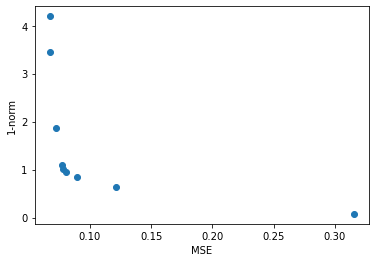

In [18]:
#Plotting of part 4
error = np.array(error) #First redefine data to ndarray (as we cannot plot list of tuples)
plt.scatter(error[:,0],error[:,1])
plt.xlabel('MSE')
plt.ylabel('1-norm');

## Maximum Likelihood Estimation

The `scipy.stats` module offers some methods to fit the parameters of a probability distribution using the maximum likelihood principle. In this exercise, we will try to implement a simple version of the maximum likelihood estimation ourselves using the `scipy.optimize` module.

### 1. Plot pdf beta distribution

In this exercise, we will consider the *beta* distribution. Note that the beta distribution has support $(0, 1)$, but all distributions in the `scipy.stats` module are extended with a location and scale parameter, `loc` and `scale`, such that the original support can be mapped to any other interval. In this exercise, we will keep things simple and fix the location and scale parameter to 0 and 1. The beta distribution has two shape parameters called `a` and `b`.

Make a plot of the pdf with scale parameters `a=2` and `b=4`.

In [68]:
a, b, loc, scale = 2, 4, 0, 1

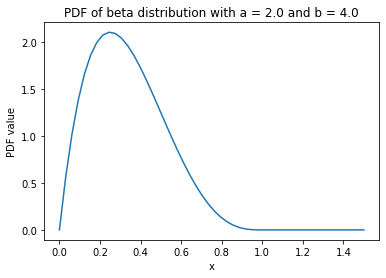

In [69]:
x = np.linspace(0,1.5)
y = stats.beta.pdf(x,a,b)

#Plotting
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('PDF value')
plt.title('PDF of beta distribution with a = %.1f and b = %.1f' % (a,b));

### 2. Draw random numbers and plot histogram

Draw 100 random numbers from this beta distribution and plot a histogram of this random sample.

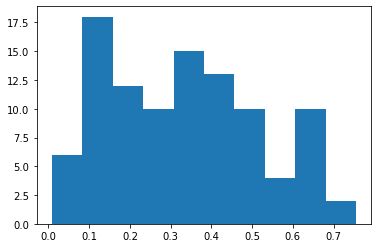

In [70]:
N = 100
data = stats.beta.rvs(a,b,size=N)
plt.hist(data);

### 3. Implement log-likelihood function

Recall the log-likelihood function:
$$\ell(a, b, x) = \sum_i \log f(x_i \vert a, b),$$
where $f(\cdot \vert a, b)$ is the pdf of the beta distribution with shape parameters $a$ and $b$. Implement this function.

In [71]:
def log_likelihood(a,b,x):
    """Return log-likelihood for Beta distribution.
    
    Arguments
    ---------
    a, b : float
        Shape parameters Beta distribution.
    x : np.ndarray
        Sample data.
    """
    return np.sum(np.log(stats.beta.pdf(x,a,b)))

### 4. Numerically maximize the log-likelihood function

Now we are going to use the `minimize` function of the `scipy.optimize` module to maximize the log-likelihood, or rather minimize the negative of the log-likelihood.

Define the function you want to minimize. The function needs the two shape parameters as its (two-dimensional) first argument. The sample can be specified as its second argument, and this needs to be specified when you call the `minimize` function.

Now use the `miminize` function to obtain estimates for the shape parameters. You don't have to specify the Jacobion or other optional parameters. If you experience numerical problems, then try to choose initial estimates that are closer to the true values.

In [72]:
def log_likelihood_min(shape,data):
    return -log_likelihood(shape[0], shape[1], data)

x0 = [1,2]
result = optimize.minimize(log_likelihood_min, x0, args=(data))
result

      fun: -33.92064078215023
 hess_inv: array([[0.05585621, 0.09656614],
       [0.09656614, 0.25191495]])
      jac: array([-5.72204590e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([1.82195294, 3.70153217])

### 5. Visualize estimated pdf

Plot the estimated pdf of the Beta distribution.

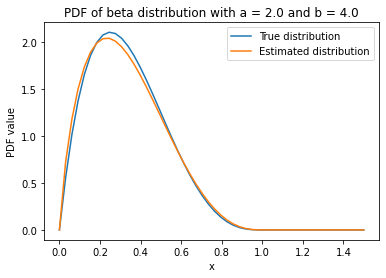

In [73]:
x = np.linspace(0,1.5)
y = stats.beta.pdf(x,a,b)
z = stats.beta.pdf(x,result.x[0],result.x[1])

#Plotting
plt.plot(x,y,label='True distribution')
plt.plot(x,z,label='Estimated distribution')
plt.legend()
plt.xlabel('x')
plt.ylabel('PDF value')
plt.title('PDF of beta distribution with a = %.1f and b = %.1f' % (a,b));